In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
from warnings import warn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def show_sl(sl):
    display(f"TE={sl.total_error}, RE={sl.total_re}")
    
    plot_segment_list(sl.dataframe)
    plt.show()
    print(str(sl))
    display(sl.dataframe)
    display(sl.dataframe.groupby(['seg','axis']).del_t.sum().unstack())
    
    

In [ ]:
sl = SegmentList([Joint(5_000, 50_000), Joint(5_000, 50_000), Joint(5_000, 50_000)])




,t,seg,axis,x,v0m,v_i,v_f,v1m,ss,del_t,calc_x,err
0,0.001000,0,0,0.0,100,100.00,49.87,1000,a,0.001000,0.074935,-0.074935
1,0.200000,0,0,10.0,100,49.87,49.87,1000,c,0.199000,9.924130,0.075870
2,0.200000,0,0,0.0,100,49.87,49.87,1000,d,0.000000,0.000000,0.000000
3,0.015556,0,1,25.0,2000,2000.00,1222.22,1000,a,0.015556,25.061783,-0.061783
4,0.195556,0,1,220.0,2000,1222.22,1222.22,1000,c,0.180000,219.999600,0.000400
5,0.200000,0,1,5.0,2000,1222.22,1000.00,1000,d,0.004444,4.938217,0.061783
6,0.059286,0,2,88.0,500,0.00,2999.79,2000,a,0.059286,88.922325,-0.922325
7,0.180714,0,2,364.0,500,2999.79,2999.79,2000,c,0.121429,364.260300,-0.260300
8,0.200000,0,2,48.0,500,2999.79,2000.00,2000,d,0.019286,48.212225,-0.212225


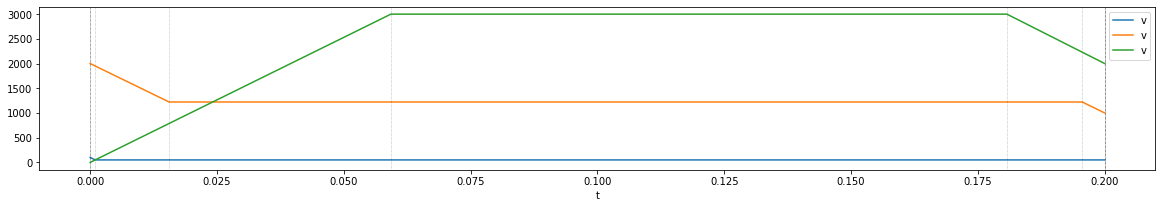

In [4]:
# This move should have an acelleration, then a constant velocity across the three semgments, then decel. It should 
# not have a sawtooth or undulating pattern. 

sl = SegmentList([Joint(5_000, 50_000), Joint(5_000, 50_000), Joint(5_000, 50_000)])
x = 500
sl.rmove([10,x/2,x])

s = sl[0]

s[0].v_0_max = 100
s[1].v_0_max = 2000
s[2].v_0_max = 500

s[0].v_0 = 2500
s[1].v_0 = 2500

s[0].v_1_max = 1000
s[1].v_1_max = 1000
s[2].v_1_max = 2000

s.update()
    
plot_segment_list(sl.dataframe)

sl.dataframe


89.97325312199729


/Users/eric/Documents/proj/trajectory/trajectory/planner.py:967: UserWarning: Failed to converge 13.937114197530832
  warn(f'Failed to converge {self.max_err_x}')
/Users/eric/Documents/proj/trajectory/trajectory/planner.py:967: UserWarning: Failed to converge 9.975121570823944
  warn(f'Failed to converge {self.max_err_x}')
/Users/eric/Documents/proj/trajectory/trajectory/planner.py:967: UserWarning: Failed to converge 89.97325312199729
  warn(f'Failed to converge {self.max_err_x}')
/Users/eric/Documents/proj/trajectory/trajectory/planner.py:1224: UserWarning: 3/0 Excessive error. err_x=89.97325312199729 re=0.08997325312199729
  
/Users/eric/Documents/proj/trajectory/trajectory/planner.py:1224: UserWarning: 3/0 Excessive error. err_x=89.97325312199729 re=0.08997325312199729
  


,t,seg,axis,x,v0m,v_i,v_f,v1m,ss,del_t,calc_x,err
0,0.075000,0,0,141.0,0.000000,0.00,3819.44,5000,a,0.075000,143.229000,-2.229000
1,0.300000,0,0,859.0,0.000000,3819.44,3819.44,5000,c,0.225000,859.374000,-0.374000
2,0.300000,0,0,0.0,0.000000,3819.44,3819.44,5000,d,0.000000,0.000000,0.000000
3,0.075000,0,1,141.0,0.000000,0.00,3819.44,5000,a,0.075000,143.229000,-2.229000
4,0.300000,0,1,859.0,0.000000,3819.44,3819.44,5000,c,0.225000,859.374000,-0.374000
5,0.300000,0,1,0.0,0.000000,3819.44,3819.44,5000,d,0.000000,0.000000,0.000000
6,0.339028,1,0,111.0,3819.444444,3819.44,1843.91,5000,a,0.039027,110.513196,0.486804
7,0.550000,1,0,389.0,3819.444444,1843.91,1843.91,5000,c,0.210973,389.014302,-0.014302
8,0.550000,1,0,0.0,3819.444444,1843.91,1843.91,5000,d,0.000000,0.000000,0.000000
9,0.302757,1,1,11.0,3819.444444,3819.44,4001.24,5000,a,0.002756,10.778852,0.221148


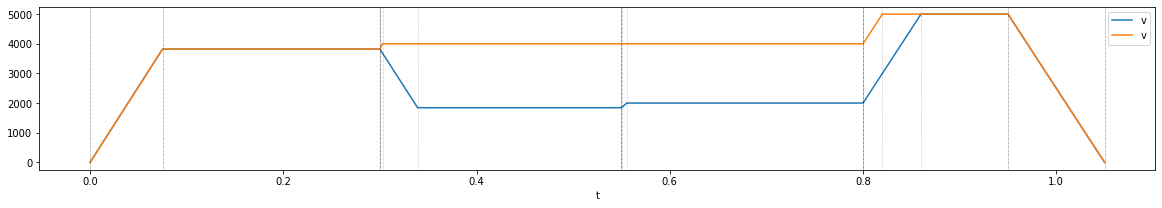

In [156]:
sl = SegmentList([Joint(5000, 50_000), Joint(5000, 50_000)])
sl.rmove([1000, 1000])
sl.rmove([500, 1000])
sl.rmove([500, 1000])
sl.rmove([1000, 1000])
sl.update()
o = sl[3].save()

plot_segment_list(sl.dataframe)
print(sl[3].max_err_x)

sl.dataframe

89.97325312199729


/Users/eric/Documents/proj/trajectory/trajectory/planner.py:967: UserWarning: Failed to converge 89.97325312199729
  warn(f'Failed to converge {self.max_err_x}')
/Users/eric/Documents/proj/trajectory/trajectory/planner.py:1224: UserWarning: 0/0 Excessive error. err_x=89.97325312199729 re=0.08997325312199729
  


(89.97325312199729, 0.25)

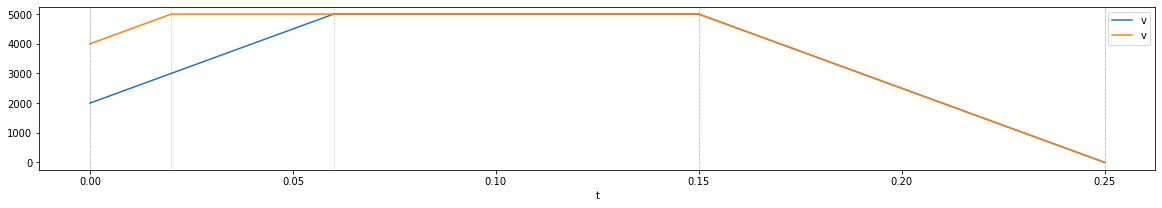

In [176]:
import numpy as np 
from trajectory.planner import inital_parameters

sl = SegmentList([Joint(5000, 50_000), Joint(5000, 50_000)])
sl.rmove([500, 500])
sl[0].load(o)

print(sl[0].max_err_x)

sl[0,0].t *= 1.3 
sl[0].update_min_time()
sl.update()
plot_segment_list(sl.dataframe)
sl[0].max_err_x,sl[0].t

In [152]:
sl.dataframe

,t,seg,axis,x,v0m,v_i,v_f,v1m,ss,del_t,calc_x,err
0,0.055987,0,0,190.0,2000.445814,2000.45,4806.43,0,a,0.055987,190.547034,-0.547034
1,0.176504,0,0,579.0,2000.445814,4806.43,4806.43,0,c,0.120518,579.260369,-0.260369
2,0.272500,0,0,230.0,2000.445814,4806.43,0.00,0,d,0.095996,230.698066,-0.698066
3,0.006556,0,1,27.0,4000.075807,4000.08,4378.23,0,a,0.006556,27.463262,-0.463262
4,0.185943,0,1,785.0,4000.075807,4378.23,4378.23,0,c,0.179387,785.397107,-0.397107
5,0.272500,0,1,187.0,4000.075807,4378.23,0.00,0,d,0.086557,189.483884,-2.483884


In [124]:
sl = SegmentList([Joint(5000, 50_000), Joint(5000, 50_000)])
sl.rmove([500, 500])

sl[0].load(o)
self = sl[0,0]
print(self.t)
print(inital_parameters(self.x, self.v_0, self.joint.v_max, self.v_1, self.joint.a_max).t)
print('--')
self = sl[0,1]
print(self.t)
print(inital_parameters(self.x, self.v_0, self.joint.v_max, self.v_1, self.joint.a_max).t)
print('--')

0.2875000000000001
0.2712650102861497
--
0.2875
0.2546313659917908
--


In [178]:
max(sl[0,0].v_c,sl[0,1].v_c)

5000

[0.15237500055269906, 0.2875000000000001, 0.2875]


/Users/eric/Documents/proj/trajectory/trajectory/planner.py:1224: UserWarning: 0/0 Excessive error. err_x=629.7566876282631 re=0.6297566876282631
  


ShortSegment: tc < 0

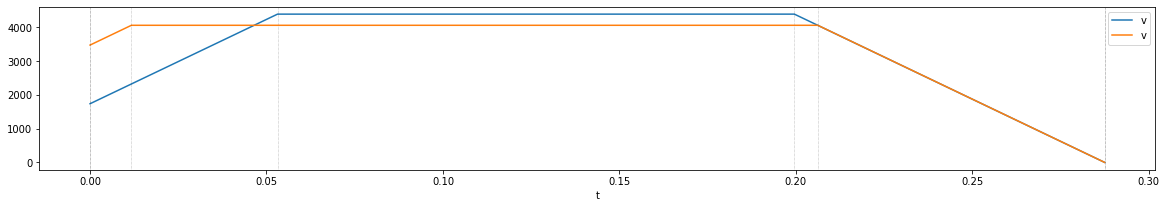

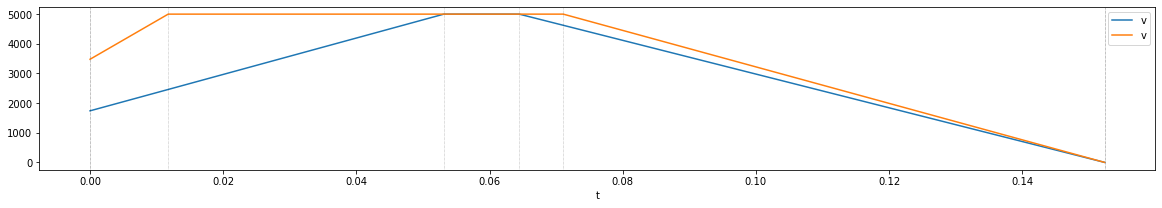

In [99]:
    
sl[0].load(o)
plot_segment_list(sl.dataframe)
self = sl[0]
self.t *= .53
print(self.times)

self.recalc()

plot_segment_list(sl.dataframe)
self.recalc()

plot_segment_list(sl.dataframe)

Params(t=0.31232917292870016, x=1000.0, t_a=0.03499108371149744, t_c=0.2023380892172027, t_d=0.075, x_a=100.60716543548986, x_c=758.7678345645102, x_d=140.625, v_0=2000.4458144251282, v_c=3750.0, v_1=0, is_triangle=False, input=InputParams(x=1000.0, v_0=2000.4458144251282, v_c=3750.0, v_1=0, a_max=50000, t=None))

In [ ]:
# Much faster accelerations than the last chart. 
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.rmove([1000, 1000])
sl.rmove([500, 1000])
sl.rmove([1000, 500])
sl.rmove([300, 1000])
sl.rmove([100, 1000])
sl.rmove([1000, 1000])
sl.update()

show_sl(sl)

In [ ]:
sl = SegmentList([Joint(5000, 300_000, 300_000),Joint(5000, 300_000, 300_000)])
sl.rmove([1000,1000])
sl.rmove([500,1000])
sl.rmove([1000,1000])
sl.rmove([-1000,1000])
sl.rmove([-1000,-1000])
sl.rmove([1000,1000])

show_sl(sl)

In [ ]:
sl.dataframe.head()

In [ ]:
sl = SegmentList([Joint(5000, 300_000, 300_000), Joint(5000, 300_000, 300_000)])
sl.rmove([18000, 20000])
sl.rmove([-100, 5000])
sl.rmove([100, 10000])
sl.rmove([-2500, 1000])
sl.rmove([100, 1000]) ## ERROR! This velocity should not be negative
sl.rmove([1000, 1000]) ## ERROR! This velocity should not be negative

df = sl.dataframe

plot_segment_list(sl.dataframe)
df[df.ss != 'c'].del_t.unique()

In [ ]:
sl = SegmentList([Joint(5000, 30_000, 30_000), Joint(5000, 30_000, 30_000)])
sl.rmove([1000, 500])
sl.rmove([1000, 1000])
sl.rmove([2000, 1000])
sl.rmove([-100, 500])
sl.rmove([100, 1000])
sl.rmove([-2500, 1000])
sl.rmove([100, 1000]) 
sl.rmove([1000, 1000]) ## ERROR! This velocity should not be negative


plot_segment_list(sl.dataframe)

print(sl.positions)

In [ ]:
sl.dataframe.groupby(['seg','axis']).x.sum()

In [ ]:
sl = SegmentList([Joint(33333, 66666)])
x = 5000
sl.rmove([x])
sl.rmove([x])
sl.rmove([-x])
sl.rmove([-x])

df = sl.dataframe

plot_segment_list(sl.dataframe)
for s in sl:
    print(s)

#sl.validate()
print(sl.positions)

In [ ]:
14.908532541958522+85.55207900072237

In [ ]:
sl = SegmentList([Joint(10000, 3000_000, 3000_000), Joint(10000, 3000_000, 3000_000)])

sl.rmove([5.0,-100.0])
sl.rmove([5.0,-100.0])
sl.rmove([-5.0,-100.0])
print(sl)
#sl.update(validate = False)



In [ ]:
10000 / 2500

In [ ]:
import numpy as np

sl = SegmentList([Joint(15000, 30_000, 30_000), Joint(15000, 30_000, 30_000)])

p = []
lx, ly = None,None
for a in np.linspace(0,2*np.pi, 25):
    x = np.sin(a)*1000000
    y = np.cos(a)*1000000
    
    
    if lx is None:
        lx, ly = x,y
        
    
    #print(f"sl.rmove([{x-lx},{y-ly}], validate=False)")
    p.append((x,y))
    sl.add_position_segment([x,y])
    lx, ly = x,y
    
df = pd.DataFrame(p, columns=['x','y'])
df.plot.scatter(x='x', y='y', figsize=(4,4))


#print(sl)
plot_segment_list(sl.dataframe)

In [ ]:
print(sl)

In [ ]:
# Get the points from the subsegments. 
def generate_points(sl):
    t = 0
    x = 0
    y = 0

    for e in sl.sub_segments:
        yield(t, x, y)
        t += e[0].t
        x += e[0].x
        y += e[1].x
l = list(generate_points(sl))

df = pd.DataFrame(l, columns = 't x y'.split()).set_index('t')
df.plot(figsize=(12,6))
df.plot.scatter(x='x', y='y', marker='.',figsize = (8, 8))

In [ ]:
def sim_df(axis, sl):
    simsegs = []
    slsegs = []
    
    for e in sl.sub_segments:
        s = e[axis]

        t, x, v0, v1 = s.t, s.x, s.v_i, s.v_f
        a = float(v1-v0)/float(t)
        if abs(round(x)) !=0:
            slsegs.append([t, x, v0, v1, a])

            simsegs += list(tj.SimSegment(v0,v1,x=x,t=t))
        
    sl_df = pd.DataFrame(slsegs, columns="t x v0 v1 a".split())
        
    df = pd.DataFrame(simsegs,columns=tj.SimSegment.row_header)
    df['tc'] = df.cn.cumsum()
    df['xn'] = df.dir.cumsum()
    df['delay'] = 1 / df.cn
        
    return sl_df, df

def plot2d(df_0, df_1):
    s = pd.DataFrame({'tc':np.linspace(df_0.tc.min(),df_0.tc.max(), 50000)})
    dfx = pd.concat([df_0[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'x'})
    dfy = pd.concat([df_1[['tc','xn']],s], sort=False).sort_values('tc').reindex().interpolate().set_index('tc')\
    .rename(columns={'xn':'y'})

    df = dfx.join(dfy)
    
    df.plot.scatter(x='x', y='y', marker='.', figsize = (8, 8))


sl_df_0, df_0 = sim_df(0,sl)

sl_df_1, df_1 = sim_df(1,sl)

ax = df_0.plot(x='tc', y='xn', figsize = (20, 8) )
ax = df_1.plot(ax=ax,x='tc', y='xn')

plot2d(df_0, df_1)